# CSC420 Assignment 3 Question 4

In [68]:
import matplotlib.pyplot as plt
import scipy
import cv2
import numpy as np
import math
from scipy.special import softmax

In [69]:
def get_image(path):
    raw_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # croped_image = np.asarray(cv2.resize(raw_image, (900, 1200), interpolation = cv2.INTER_AREA))
    # plt.imshow(raw_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return raw_image

In [70]:
def get_gradient(image):
    sobelx = np.array(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3))
    sobely = np.array(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3))
    gradient = np.array([sobelx, sobely])
    gradient = gradient.transpose(1, 2, 0)
    gradient_magnitude = np.sqrt(sobelx * sobelx + sobely * sobely)
    # plt.imshow(gradient_magnitude, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return sobelx, sobely, gradient, gradient_magnitude

In [71]:
def get_eigenvalues(det, trace):
    diff = np.sqrt(trace * trace - 4 * det)
    lambda_1 = (trace - diff) / 2
    lambda_2 = (trace + diff) / 2
    eigenvalues = np.array([lambda_1, lambda_2]).transpose(1, 2, 0)
    return lambda_1, lambda_2, eigenvalues

In [72]:
I1 = get_image('Q4/University_College,_University_of_Toronto.jpg')

In [73]:
# blur1 = cv2.GaussianBlur(I1,(5,5),7)
Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(I1)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1f270fae250>)

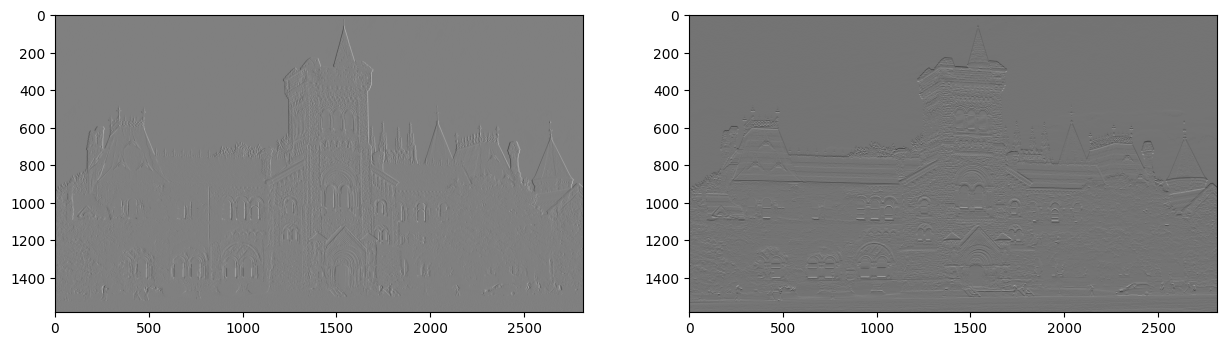

In [74]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(Ix,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(Iy,cmap = 'gray')

In [75]:
Ix.min(), Ix.max(), Iy.min(), Iy.max()

(-804.0, 802.0, -653.0, 788.0)

In [76]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1f27104c640>)

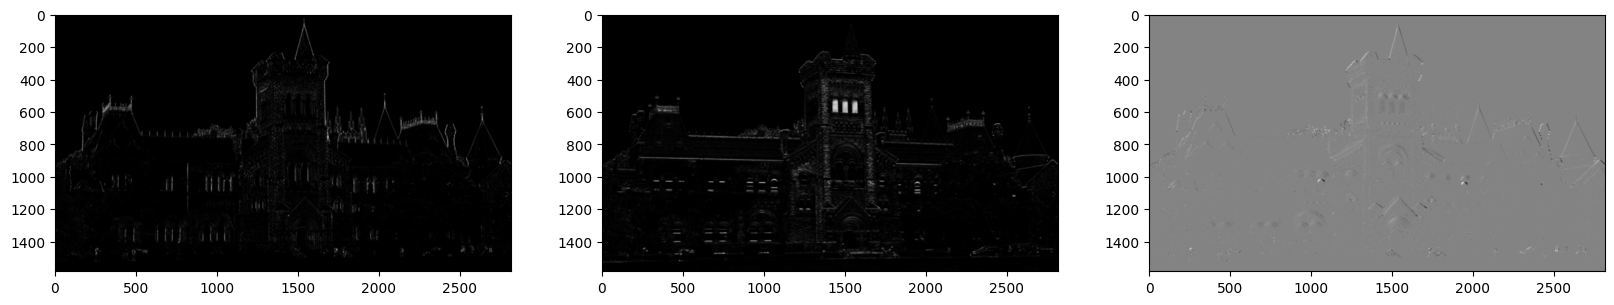

In [77]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')

In [78]:
# (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1f27106b040>)

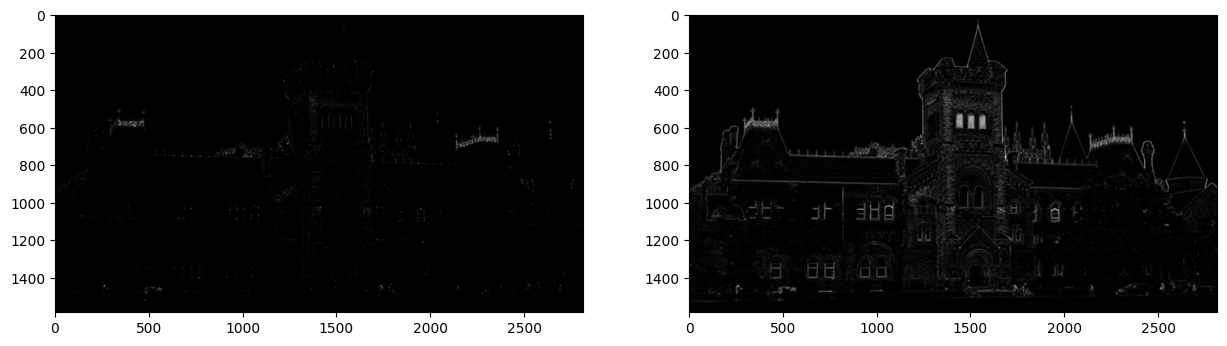

In [79]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

In [80]:
lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
print(eigenvalues.shape)
print(lambda_1.shape)
print(lambda_2.shape)

(1584, 2816, 2)
(1584, 2816)
(1584, 2816)


In [83]:
def do_all_the_things(path):
    image = get_image(path)
    # blur = cv2.GaussianBlur(I1,(5,5),7)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(I1)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)
    # (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
    plt.scatter(lambda_2.flatten(), lambda_1.flatten())
    plt.show()

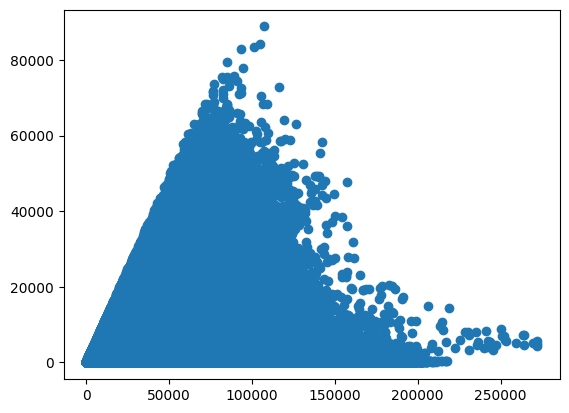

In [84]:
do_all_the_things('Q4/University_College,_University_of_Toronto.jpg')

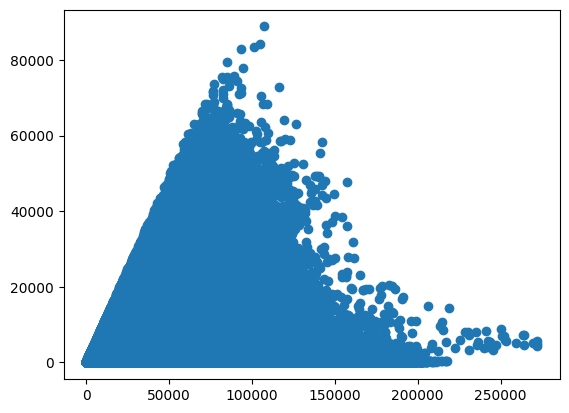

In [85]:
do_all_the_things('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg')